# Assignment Week-7: Heart Disease Prediction 
#### This project aims to build a robust machine learning model that predicts the presence of heart disease based on clinical and demographic features. Using the Cleveland Heart Disease dataset from the UCI repository, the model leverages a range of medical parameters such as age, sex, chest pain type, blood pressure, cholesterol levels, and other important risk factors.

#### To ensure a high-performing and reliable prediction system, the project includes extensive data preprocessing, exploratory data analysis (EDA), feature importance analysis, and hyperparameter tuning using GridSearchCV. The final model achieved strong performance metrics, validated through accuracy score, classification report, confusion matrix, and ROC-AUC score.

#### Beyond model training, the project focuses on making the model accessible and interactive through a web application developed with Streamlit. The deployed application allows users to input their health data via an intuitive interface and instantly receive predictions about their heart disease risk, along with probability scores and feature insights.

## Step 1- Importing Libraries 

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

## Step 2 - Loading data 

In [125]:
data = pd.read_csv("heart_cleveland_dataset.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


# Step 3 - Basic Info

In [128]:
print(data.info())
print(data.describe())
print(data .info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1

## Step 4 - Checking Missing Values 

In [131]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


## Step 5 - Exploratory Data Analysis (EDA)


condition
0    160
1    137
Name: count, dtype: int64


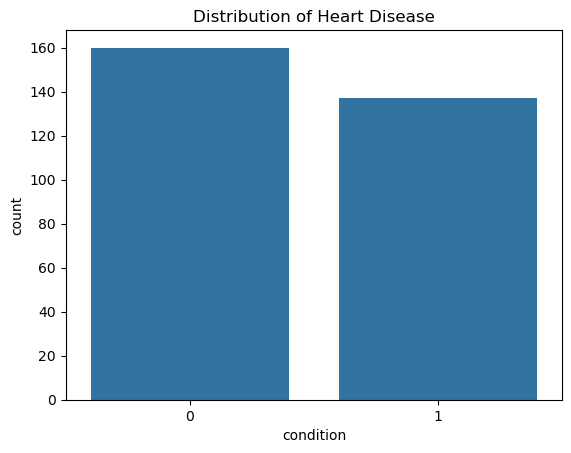

In [134]:
# a. Target Variable Distribution
print(data['condition'].value_counts())
sns.countplot(data=data, x='condition')
plt.title('Distribution of Heart Disease')
plt.show()

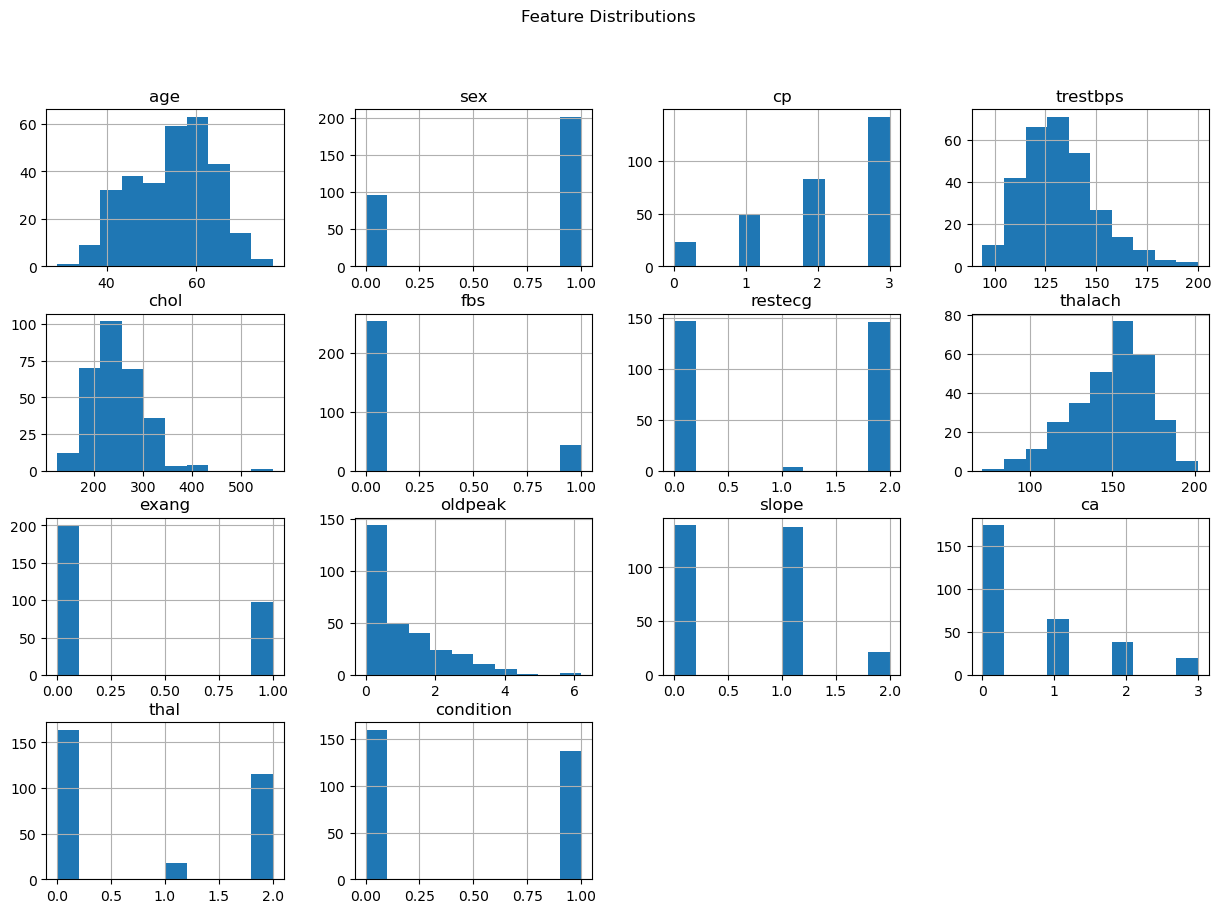

In [136]:
# b. Feature Distributions
data.hist(figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

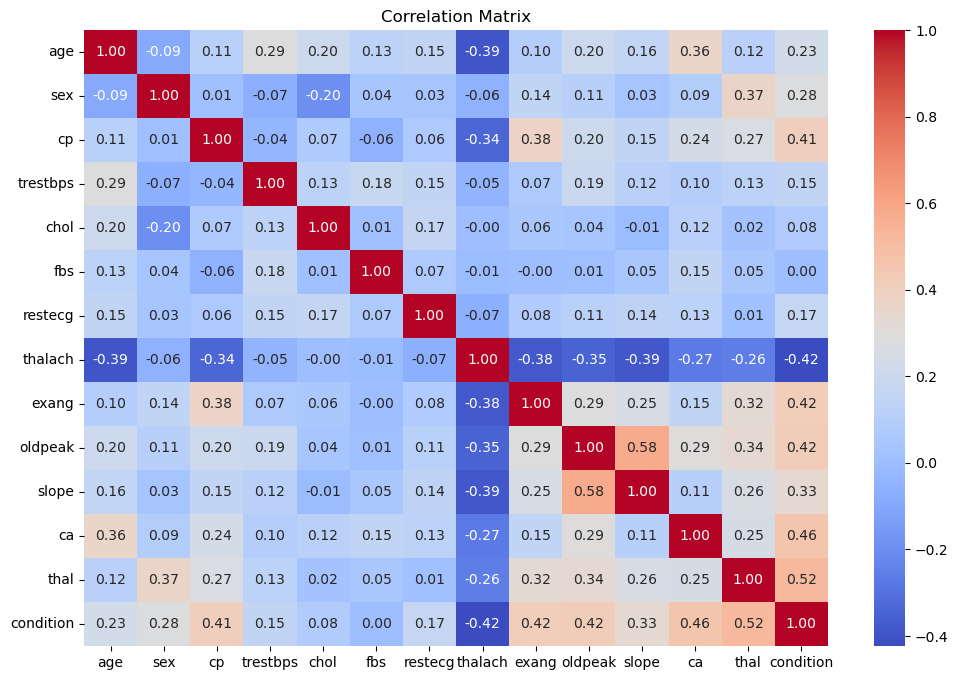

In [137]:
# c. Correlation Analysis
# Correlation matrix
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Step 6 - Data Preprocessing

In [139]:
# a. Split Features and Target
X = data.drop('condition', axis=1)
y = data['condition']

In [140]:
# b. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [141]:
#c. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 7 - Model Training - Training multiple models 

In [144]:
# 1 Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [145]:
# 2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [150]:
#3  XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Step 8 - Compare ROC Curves

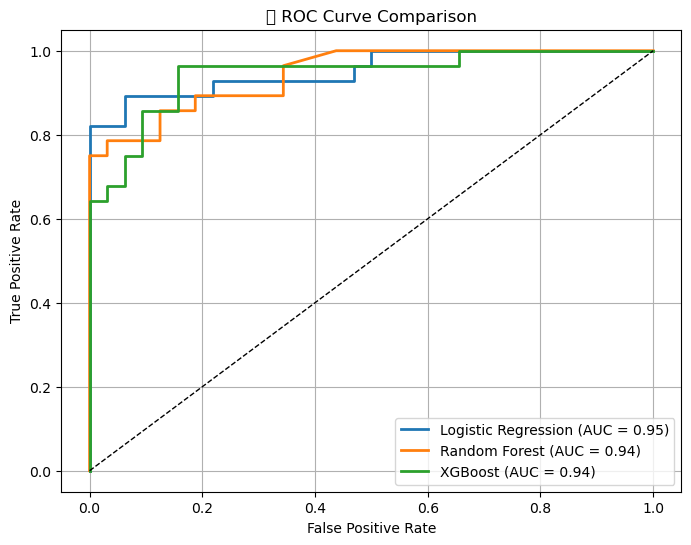

In [161]:
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔍 ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()



## Step 9 - Model Evaluation 


--- Logistic Regression ---
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



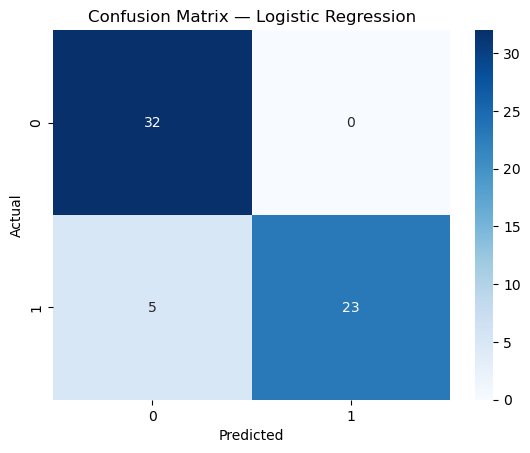


--- Random Forest ---
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



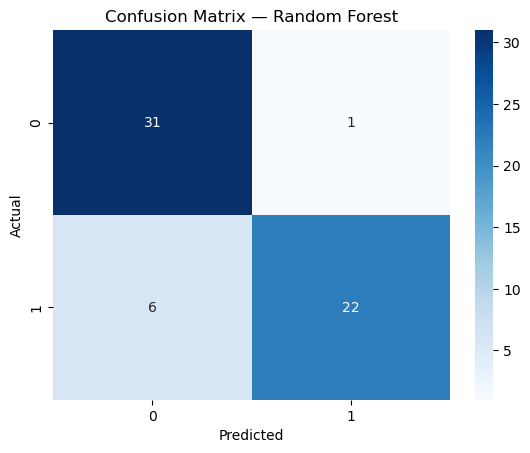


--- XGBoost ---
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



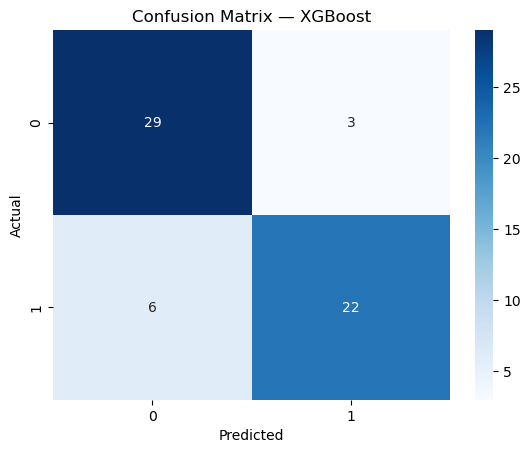

In [165]:
for name, model in models.items():
    print(f'\n--- {name} ---')
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix — {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Here Logistic Regression is giving us best accuracy so we will choose it as our best model

## Step 10 — Saving the Best Model & Scaler

In [171]:
import joblib
joblib.dump(lr_model, 'heart_logistic_regression.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']